# Camera Distance and Resolution: Flat Art / Copywork Lighting Diagram
1). Given a camera, lens, and object (usually flat works like flat art on paper, paintings, prints, etc.), determine the camera position for a chosen output resolution. The distance between camera and object is returned.

2) Given an object, determine the position of lights (a minimum of two, one on each side of the object).

In [ ]:
from numpy import floor
import numpy as np
from fractions import Fraction as frac
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Using the Distance and Resolution tool

Enter Parameters:
* camera: Choose a camera or digital back from the dictionary of cameras
* lens_focal_len_mm: Select the focal length of the lens in millimeters
* real_object_units: Select the unit of measurment used to measure the width and height of the artwork
* real_object_width: Width of the artwork in units selected in real_object_units
* real_object_height: Height of the artwork in units selected in real_object_units
* set_ppi: Set to desired resolution in pixels per inch
* radius_multiply: Set to desired radius multiplier to control light coverage. A value of 1 will set light coverage to fit object at 100%. Increase multiplier to expand light coverage and reduce vignetting in image area.

Output:
* Sensor usage in percent for width and height
* MAX PPI: The maximum ppi value possible with selected camera and focal length when fitting the whole artwork within
* 5% Fit PPI: The maximum ppi value possible reduced by 5%
* Dimensions: The output image dimensions in pixels (widthxheight)
* PPI: The ppi value set in set_ppi
* Camera: The camera or digital back being used
* Sensor size: The camera's sensor size in millimeters(mm) and pixels(px)
* Focal length: The focal length of the lens in millimeters(mm)
* Camera distance: Distance from the camera to the center of the artwork in millimeters(mm), centimeters(cm), inches(in), and feet(ft) and inches(in)
* Lights distance x: Distance from the light to the center of the artwork on the x-axis (artwork plane) in millimeters(mm), centimeters(cm), inches(in), and feet(ft) and inches(in)
* Lights distance y: Distance from the light to the center of the artwork on the y-axis (lens plane) in millimeters(mm), centimeters(cm), inches(in), and feet(ft) and inches(in)

Using 76.31% of sensor's width and 87.21% of height
MAX PPI: 172.0
5% Fit PPI: 163.4

Dimensions: 6300 x 4800 pixels
PPI: 150.0


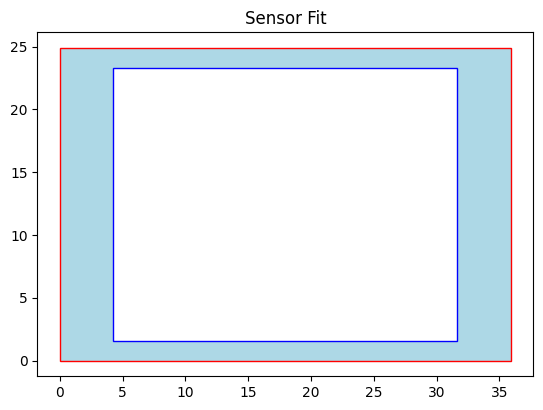

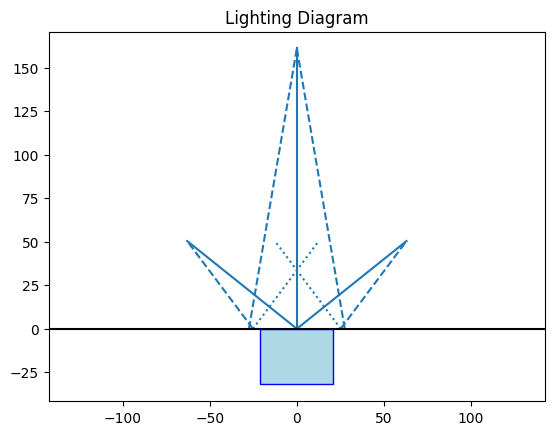


Camera: Nikon D850
Sensor size: 35.9 x 24.9mm / 8256 x 5504 pixels
Focal length: 105mm
Camera distance: 4088.9 mm / 408.89 cm / 160.98 in / 13 ft 4 49/50 in
Lights distance x: 1600.2 mm / 160.02 cm / 63.0 in / 5 ft 3 in
Lights distance y: 1280.16 mm / 128.02 cm / 50.4 in / 4 ft 2 2/5 in


In [ ]:
# Dictionary of digital camera bodies and backs with sensor size and pixel dimensions
camera_dict = {
  "Nikon D810":{
  "sensor_w_mm": 35.96,
  "sensor_h_mm" : 24,
  "sensor_w_px": 7360,
  "sensor_h_px": 4912,},
  "Nikon D850":{
  "sensor_w_mm": 35.9,
  "sensor_h_mm" : 24.9,
  "sensor_w_px": 8256,
  "sensor_h_px": 5504,},
  "Canon 5D Mark IV":{
  "sensor_w_mm": 36,
  "sensor_h_mm" : 24,
  "sensor_w_px": 6720,
  "sensor_h_px": 4480,},
  "Canon 5Ds R":{
  "sensor_w_mm": 36,
  "sensor_h_mm" : 24,
  "sensor_w_px": 8688,
  "sensor_h_px": 5792,},
  "Phase One P30+":{
  "sensor_w_mm": 44.2,
  "sensor_h_mm" : 33.1,
  "sensor_w_px": 6496,
  "sensor_h_px": 4872,},
  "Phase One IQ4 150MP":{
  "sensor_w_mm": 53.4,
  "sensor_h_mm" : 40,
  "sensor_w_px": 14204,
  "sensor_h_px": 10652,}
}

# form fields
#@title Distance and Resolution { run: "auto", vertical-output: true, form-width: "800px" }
camera = 'Nikon D850' # @param ["Nikon D810", "Nikon D850", "Canon 5D Mark IV", "Canon 5Ds R", "Phase One P30+", "Phase One IQ4 150MP"]
sensor = camera_dict[camera]
sensor_ratio = sensor['sensor_w_px'] / sensor['sensor_h_px']
lens_focal_len_mm = 105 #@param ["24", "45", "50", "85", "90", "100", "105", "110", "120", "135", "150", "200", "240"] {type:"raw"}
real_object_units = "inches" # @param ["mm", "cm", "inches"]
real_object_width =  42#@param {type:"number"}
real_object_height =  32#@param {type:"number"}
set_ppi = 150 #@param {type:"slider", min:100, max:1400, step:10}
radius_multiply = 1.2 #@param {type:"slider", min:1, max:5, step:0.1}

# convert real object width and height to inches if provided in cm or mm
if real_object_units == 'cm':
  real_object_width = real_object_width * 0.393701
  real_object_height = real_object_height * 0.393701
if real_object_units == 'mm':
  real_object_width = real_object_width * 0.0393701
  real_object_height = real_object_height * 0.0393701

# calculate object width and height in pixels by multiplying ppi by object measurements in inches
object_w_px = int(set_ppi * real_object_width)
object_h_px = int(set_ppi * real_object_height)
# lookup sensor size values in mm and pixels from dictionary
sensor_w_mm = sensor["sensor_w_mm"]
sensor_h_mm =sensor["sensor_h_mm"]
sensor_w_px = sensor["sensor_w_px"]
sensor_h_px = sensor["sensor_h_px"]
# calculate object width and height in mm on sensor by multiplying sensor size in mm by object
# size in pixels and dividing by the sensor size in pixels
object_w_on_film_mm = (sensor_w_mm * object_w_px) / sensor_w_px
object_h_on_film_mm = (sensor_h_mm * object_h_px) / sensor_h_px
# calculate object resolution by dividing object in pixels by object in inches (should equal set_ppi value)
PPI = object_w_px / real_object_width
# calculate camera distance to object by multiplying object width by lens focal length and dividing
# by object size on sensor
distance = (real_object_width * lens_focal_len_mm) / object_w_on_film_mm
# distance_ft_in = int(distance/12)
sensor_usage_w =  round((object_w_on_film_mm / sensor_w_mm) * 100, 2)
sensor_usage_h =  round((object_h_on_film_mm / sensor_h_mm) * 100, 2)
max_w_px = sensor_w_px / real_object_width
max_h_px =  sensor_h_px / real_object_height
max_w_in = sensor_w_px / PPI

if object_w_on_film_mm > sensor_w_mm:
  print("Warning! The object width does not fit in frame.")
if object_h_on_film_mm > sensor_h_mm:
  print("Warning! The object height does not fit in frame.")

print('Using ' + str(sensor_usage_w) + "% of sensor's width and "
  + str(sensor_usage_h) + "% of height")

if real_object_width  >= real_object_height * sensor_ratio:
  print("MAX PPI: " + str(round(max_w_px, 2)))
  print("5% Fit PPI: " + str(round(max_w_px * .95, 2)))
else:
  print("MAX PPI: " + str(round(max_h_px, 2)))
  print("5% Fit PPI: " + str(round(max_h_px * .95, 2)))

print("\nDimensions: " + str(object_w_px) + " x " + str(object_h_px) + " pixels")
print("PPI: " + str(round(PPI, 2)))

# plot fiigure showing object fit on sensor
plt.axes()
object_x = (sensor_w_mm / 2) - (object_w_on_film_mm / 2)
object_y = (sensor_h_mm / 2) - (object_h_on_film_mm / 2)
sensor_shape = plt.Rectangle((0,0), sensor_w_mm, sensor_h_mm, fc='lightblue',ec="red")
object_shape = plt.Rectangle((object_x,object_y), object_w_on_film_mm, object_h_on_film_mm, fc='white',ec="blue")
plt.gca().add_patch(sensor_shape)
plt.gca().add_patch(object_shape)
plt.title('Sensor Fit')
plt.axis('scaled')
plt.show()

# plot figure showing camera and lighting diagram
artwork =  plt.Rectangle(((-real_object_width / 2),-real_object_height), real_object_width, real_object_height, fc='lightblue',ec="blue")
radius = (real_object_width * radius_multiply) / 2
camera_placement = plt.Line2D((0, 0), (0, distance), lw=1.5)
camera_v1 =  max_w_in / 2
camera_v1 = plt.Line2D((camera_v1, 0), (0, distance), lw=1.5, linestyle='dashed')
camera_v2 = -max_w_in / 2
camera_v2 = plt.Line2D((camera_v2, 0), (0, distance), lw=1.5, linestyle='dashed')
light_1x = radius * 2.5
light_1y = radius * 2
light_1 = plt.Line2D((0, light_1x), (0, light_1y), lw=1.5)
light_1a = plt.Line2D((radius, light_1x), (0, light_1y), lw=1.5, linestyle='dashed')
light_1b = plt.Line2D((radius, radius-(light_1x-radius)), (0, light_1y), lw=1.5, linestyle='dotted')
light_2x = -radius * 2.5
light_2y = radius * 2
light_2 = plt.Line2D((0, light_2x), (0, light_2y), lw=1.5)
light_2a = plt.Line2D((-radius, light_2x), (0, light_2y), lw=1.5, linestyle='dashed')
light_2b = plt.Line2D((-radius, -radius-(light_2x+radius)), (0, light_2y), lw=1.5, linestyle='dotted')
ax = plt.gca()
ax.add_patch(artwork)
ax.add_line(camera_placement)
ax.add_line(camera_v1)
ax.add_line(camera_v2)
ax.add_line(light_1)
ax.add_line(light_1a)
ax.add_line(light_1b)
ax.add_line(light_2)
ax.add_line(light_2a)
ax.add_line(light_2b)
ax.set_ylim(-real_object_height,distance * 1.2)
ax.axhline(0,color='black')
plt.axis('equal')
plt.title('Lighting Diagram')
plt.show()

def convertUnits(measurement, unit="inches"):
  if unit == 'cm':
    measurement = measurement * 0.393701
  elif unit == 'mm':
    measurement = measurement * 0.0393701
  return measurement / .0393701, measurement / .393701, measurement

def printMeasurements(measurements):
  mm, cm, inches = measurements
  string = ""
  string += str(round(mm, 2)) + " mm / "
  string += str(round(cm, 2)) + " cm / "
  string += str(round(inches, 2)) + " in / "
  if inches // 12 > 0:
    string += str(int(inches // 12)) + " ft"
  if floor(inches % 12) > 0:
    string +=  " " + str(int(floor(inches % 12)))
  if round(inches - int(inches), 1) > 0:
    string += " " + str(frac(str(round(inches - int(inches), 2))))
  string += " in"
  return string

print("\nCamera: " + str(camera))
print("Sensor size: " + str(sensor_w_mm) + " x " + str(sensor_h_mm) + "mm / " +
      str(sensor_w_px) + " x " + str(sensor_h_px) + " pixels")
print("Focal length: " + str(lens_focal_len_mm) + "mm")
print("Camera distance: "  + printMeasurements(convertUnits(distance, "inches")))
print('Lights distance x: ' + printMeasurements(convertUnits(light_1x, "inches")))
print('Lights distance y: ' + printMeasurements(convertUnits(light_1y, "inches")))